In [8]:
import MEbatch_hs
import numpy as np
import matplotlib.pyplot as plt

def plot_spectrum(profile):
  
    plt.title('sample spectrum')
  
    
    for i in range(4):
        plt.subplot(2,2,i+1)
        plt.plot((profile.T)[i])

In [9]:
l_v = [6302.5, 2.5, 1]
argument = np.linspace(6302.0692255, 6303.2544205, 56)
line_arg = 1000*(argument - 6302.5)

In [55]:
p_v0 = np.array([500, 20, 20, 20, 1, 10, 10000, 10000, 0, 1, 0])

In [56]:
profile0 = MEbatch_hs.ME_ff(l_v, p_v0, line_arg)

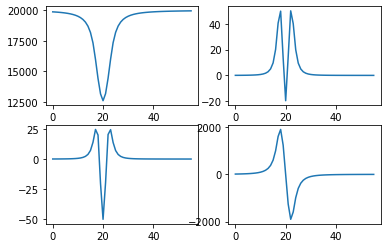

In [57]:
plot_spectrum(profile0)

Интенсивность континуума соответствует величине компоненты I вдали от центра линии. Из графика видно, что это значение близко к максимальному значению профиля I.

In [58]:
cont = p_v0[6] + l_v[2]*p_v0[7]

In [59]:
cont

20000

In [60]:
np.max(profile0)

19960.386966000064

При обучении мы посылаем в сеть величину cont, вычисленную из параметров. Для данного профиля это будет величина 20000.

In [61]:
profile_noise = profile0 + 100*np.random.normal(size = profile0.shape)

In [62]:
training_profile = profile_noise/cont

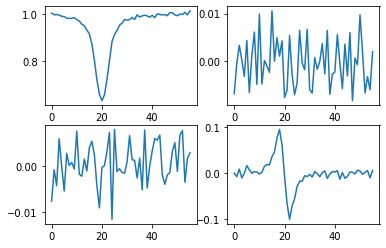

In [63]:
plot_spectrum(training_profile)

In [64]:
np.max(training_profile)

1.0120884905842906

При обучении в сеть пойдет такой профиль

-------

Теперь рассмотрим, что происходит с тем же профилем при инверсии

In [65]:
real_profile = profile_noise

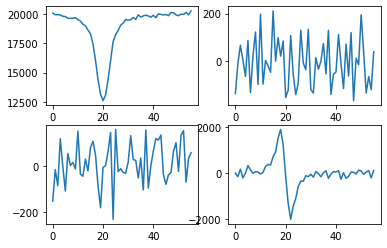

In [66]:
plot_spectrum(real_profile)

Т.к. при инверсии истинная интенсивность континуума нам уже неизвестна, то в качестве нее мы принимаем максимальное значение профиля:

In [67]:
inversion_cont = np.max(real_profile)

In [68]:
inversion_cont

20241.769811685812

На нее же нормируется профиль для подачи в сеть:

In [69]:
prediction_profile = real_profile/inversion_cont

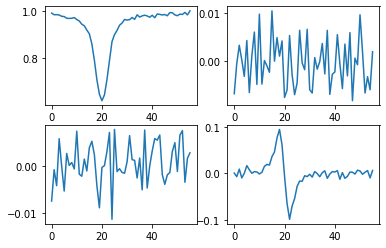

In [70]:
plot_spectrum(prediction_profile)

In [71]:
np.max(prediction_profile)

1.0

В обоих случаях мы ожидаем от сети одинаковый выход, однако подаем на вход разные значения cont и отличающиеся по масштабу профили.